Análisis de datos en salud
============================

Unidad 7 - Parte práctica
-----------------------------------------------------


## Datos de grafos

El grafo del **Club de Karate de Zachary** es un ejemplo clásico de un grafo social y representa las relaciones entre los 34 miembros de un club de karate, tanto en términos de su interacción social como de sus roles dentro del club.

- Cada nodo del grafo representa a un miembro del club. Hay 34 nodos en total.
- Las aristas entre los nodos indican las interacciones sociales entre los miembros del club. Si dos miembros tienen una relación, entonces se conectan.
- El grafo muestra que algunos miembros tienen muchas conexiones (son más populares o interactúan más), mientras que otros tienen menos.


### Ejercicio 1

Primero de todo vamos a explorar un poco grafo y su estructua.

a) Carga el grafo del club de karate de Zachary en NetworkX y visualizalo con Matplotlib.

b) Dibuja el grafo con diferentes estilos de nodos y aristas para representar la división en facciones.

c) Calcula y muestra el número de nodos y aristas del grafo.

d) ¿Cuál es el grado (*degree*) medio de los nodos? ¿Qué nodo tiene mayor grado?

e) Calcula las medidas de centralidad (de grado, cercanía e intermediación) para todos los nodo. Interpreta su significado en el contexto del grafo.


In [ ]:
# Respuesta

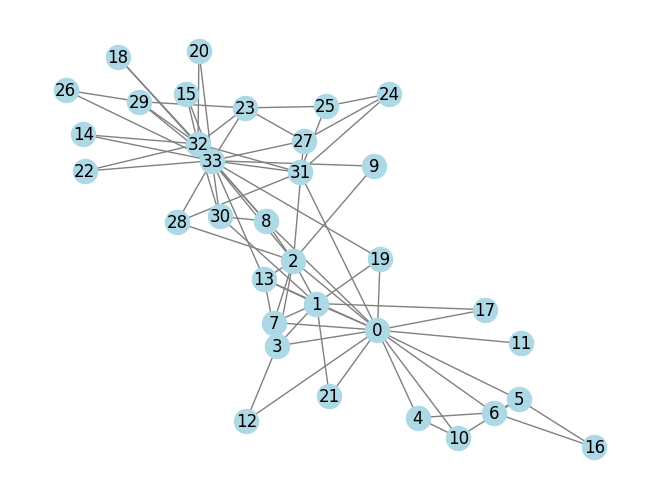

In [ ]:
# Cargamos las librerías necesarias
import networkx as nx
import matplotlib.pyplot as plt

## a)

# Cargamos el grafo Karate Club de la librería networkx
G = nx.karate_club_graph()

# Visualizamos el gráfico
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

In [ ]:
## b)

# Vamos a obtener todos los atributos de los nodos
node_data = G.nodes(data=True)

# Mostramos los atributos de cada nodo
for node, data in node_data:
    print(f"Node {node}: {data}")


Node 0: {'club': 'Mr. Hi'}
Node 1: {'club': 'Mr. Hi'}
Node 2: {'club': 'Mr. Hi'}
Node 3: {'club': 'Mr. Hi'}
Node 4: {'club': 'Mr. Hi'}
Node 5: {'club': 'Mr. Hi'}
Node 6: {'club': 'Mr. Hi'}
Node 7: {'club': 'Mr. Hi'}
Node 8: {'club': 'Mr. Hi'}
Node 9: {'club': 'Officer'}
Node 10: {'club': 'Mr. Hi'}
Node 11: {'club': 'Mr. Hi'}
Node 12: {'club': 'Mr. Hi'}
Node 13: {'club': 'Mr. Hi'}
Node 14: {'club': 'Officer'}
Node 15: {'club': 'Officer'}
Node 16: {'club': 'Mr. Hi'}
Node 17: {'club': 'Mr. Hi'}
Node 18: {'club': 'Officer'}
Node 19: {'club': 'Mr. Hi'}
Node 20: {'club': 'Officer'}
Node 21: {'club': 'Mr. Hi'}
Node 22: {'club': 'Officer'}
Node 23: {'club': 'Officer'}
Node 24: {'club': 'Officer'}
Node 25: {'club': 'Officer'}
Node 26: {'club': 'Officer'}
Node 27: {'club': 'Officer'}
Node 28: {'club': 'Officer'}
Node 29: {'club': 'Officer'}
Node 30: {'club': 'Officer'}
Node 31: {'club': 'Officer'}
Node 32: {'club': 'Officer'}
Node 33: {'club': 'Officer'}


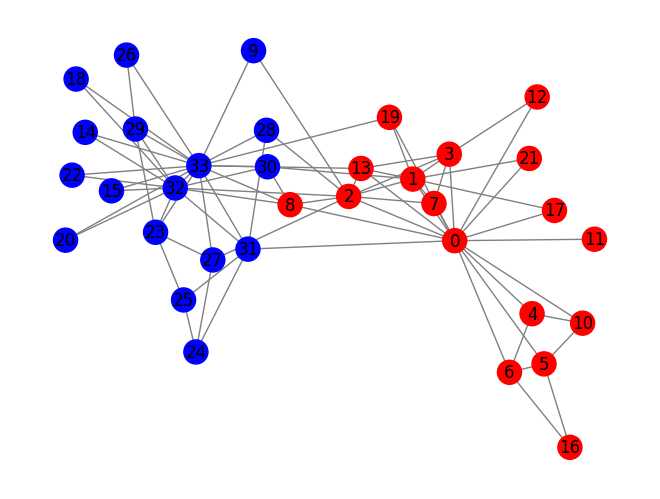

In [ ]:
# Sabiendo los atributos, podemos identificar dos grupos (facciones)
clubs = nx.get_node_attributes(G, 'club')

# Coloreamos de distinto color según la facción
colors = ['red' if clubs[i] == 'Mr. Hi' else 'blue' for i in G.nodes()]

# Volvemos a mostrar el grafo
nx.draw(G, with_labels=True, node_color=colors, edge_color='gray')
plt.show()

In [ ]:
## c)

# Guardamos el número de nodos y aristas
num_nodos = G.number_of_nodes()
num_aristas = G.number_of_edges()

# Mostramos el resultado por pantalla
print(f'Nodos: {num_nodos}, Aristas: {num_aristas}')

Nodos: 34, Aristas: 78


In [ ]:
## d)

# Calculamos el grado medio y el máximo
grado_medio = sum(dict(G.degree()).values()) / G.number_of_nodes()
nodo_max_grado = max(G.degree, key=lambda x: x[1])

# Mostramos el resultado por pantalla
print(f'Grado medio: {grado_medio}, Nodo con mayor grado: {nodo_max_grado}')

Grado medio: 4.588235294117647, Nodo con mayor grado: (33, 17)


In [ ]:
## e)

# Calculamos las medidas de centralidad y mostramos el valor

centralidad_grado = nx.degree_centrality(G)
nodo_max_centrality1 = max(centralidad_grado.items(), key=lambda x: x[1])
print(f'Centralidad de grado: {nodo_max_centrality1}')


centralidad_cercania = nx.closeness_centrality(G)
nodo_max_centrality2 = max(centralidad_cercania.items(), key=lambda x: x[1])
print(f'Centralidad de cercania: {nodo_max_centrality2}')

centralidad_intermediacion = nx.betweenness_centrality(G)
nodo_max_centrality3 = max(centralidad_intermediacion.items(), key=lambda x: x[1])
print(f'Centralidad de intermediacion: {nodo_max_centrality3}')



Centralidad de grado: (33, 0.5151515151515151)
Centralidad de cercania: (0, 0.5689655172413793)
Centralidad de intermediacion: (0, 0.43763528138528146)


**Centralidad de grado**

La centralidad de grado mide cuántas conexiones directas tiene un nodo con otros nodos. Un nodo con un alto valor de centralidad de grado está muy conectado dentro de la red. El `nodo 33` tiene una centralidad de grado de 0.5151, lo que significa que tiene un número significativo de conexiones directas con otros miembros del club. Este nodo probablemente sea uno de los miembros más activos o influyentes dentro del grafo.

**Centralidad de cercanía**

La centralidad de cercanía mide qué tan cerca está un nodo de todos los demás nodos en el grafo. El `nodo 0` tiene una centralidad de cercanía de 0.5690, lo que significa que este nodo está relativamente cerca de todos los demás nodos en la red, en términos de número de pasos o conexiones. Es decir, tiene un buen acceso a otros miembros del club, lo que le permitiría influir o interactuar rápidamente con la mayoría de los miembros.

**Centralidad de intermediación**

La centralidad de intermediación mide qué tan importante es un nodo para la comunicación entre otros nodos en la red. Específicamente, mide cuántas veces un nodo actúa como un "puente" en el camino más corto entre otros dos nodos. El `nodo 0` tiene una centralidad de intermediación de 0.4376, lo que indica que este nodo tiene un papel crucial como intermediario entre otros nodos. Probablemente actúe como un "conector" o "puente" entre distintos grupos dentro del club, facilitando la comunicación o interacción entre miembros que de otro modo no estarían tan conectados.

### Ejercicio 2

Ahora que ya estamos más familiarizados con los datos, vamos a detectar comunidades dentro del grafo.

a) Aplica el algoritmo de Girvan-Newman para detectar comunidades dentro del grafo.

b) Visualiza el grafo coloreando los nodos según su comunidad detectada.

In [ ]:
# Respuesta

In [ ]:
## a)

# Cargamos el algoritmo de detección de comunidades
from networkx.algorithms.community import girvan_newman

# Encontramos las comunidades usando Girvan-Newman
comunidades = list(girvan_newman(G))

# Mostramos las comunidades
print(comunidades)

[({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}), ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9}), ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9}), ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}), ({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}, {11}), ({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {26}), ({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {12}, {26}), ({0, 1, 3, 7, 13, 17, 19, 21}, {2

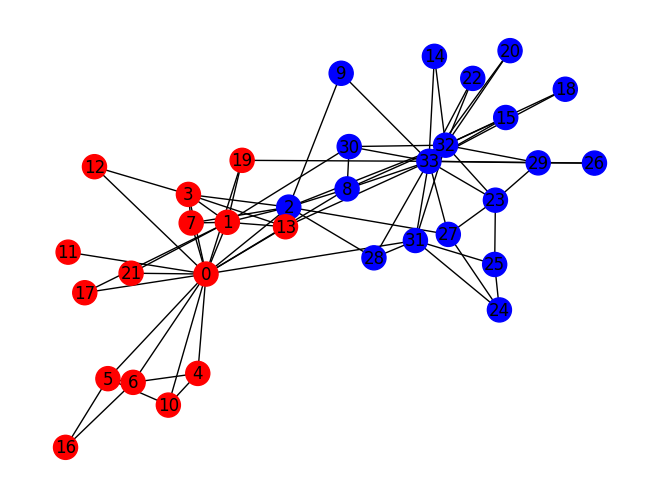

In [ ]:
## b)

import itertools
comunidades = list(next(girvan_newman(G)))
colors = itertools.cycle(['red', 'blue', 'green', 'yellow'])
colores_nodos = {}
for color, comunidad in zip(colors, comunidades):
    for nodo in comunidad:
        colores_nodos[nodo] = color

nx.draw(G, node_color=[colores_nodos[n] for n in G.nodes()], with_labels=True)
plt.show()

### Ejercicio 3

A continuación, vamos a analizar los caminos y la connectividad dentro del grafo.

a) Encuentra la distancia mínima entre dos nodos dados utilizando el camino más corto.

b) Calcula el coeficiente de clustering del grafo y comenta su significado.


In [ ]:
# Respuesta

In [ ]:
## a)

# Encontramos el camino más corto del grafo
# para ir del nodo 0 al 33
camino_mas_corto = nx.shortest_path(G, source=0, target=33)

# Mostramos los pasos del camino
print(camino_mas_corto)

[0, 8, 33]


In [ ]:
## b)

# Calculamos el coeficiente de clustering del grafo
coef_clustering = nx.average_clustering(G)

# Mostramos el valor del coeficiente
print(f'Coeficiente de clustering promedio: {coef_clustering}')

Coeficiente de clustering promedio: 0.5706384782076823


El **coeficiente de clustering** mide la tendencia de los nodos a agruparse con otros nodos cercanos. Un valor cercano a 1 indica que casi todos los nodos están conectados entre sí, mientras que un valor cercano a 0 indica que los nodos no tienden a agruparse con sus vecinos, lo que sugiere un grafo más disperso.

El coeficiente de clustering promedio de 0.5706 sugiere que los miembros del club de karate tienden a formar grupos dentro del club, pero no todos están estrechamente conectados entre sí.